# RECONOCIMIENTO DE NÚMEROS

### PREPARACIÓN DE LA INFORMACIÓN

Inicialmente se importa las librerias de mayor uso

In [1]:
import numpy as np # algebra lineal
import pandas as pd # procesamiento de datos
import matplotlib.pyplot as plt # hacer graficos
from sklearn import metrics

Se carga la base de datos y se verifica la información que contiene

In [2]:
# importa la base de datos de los digitos
from sklearn.datasets import load_digits
digits = load_digits()

# averigua que contiene la base digits
print("shape: ", digits.data.shape)
print("keys: ", digits.keys())
print("target names: ", digits['target_names'])

shape:  (1797, 64)
keys:  dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
target names:  [0 1 2 3 4 5 6 7 8 9]


Se puede observar una pequeña muestra de las imagenes

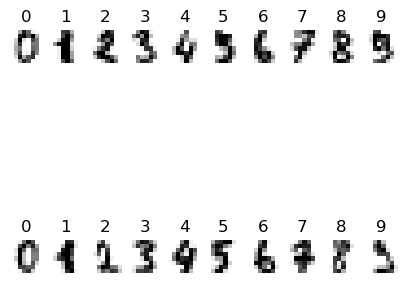

In [3]:
# visualización de las imagenes
images_and_labels = list(zip(digits.images, digits.target))
plt.figure(figsize=(5,5))
for index, (image, label) in enumerate(images_and_labels[:20]):
    plt.subplot(2, 10, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('%i' % label)

Para el entrenamiento, se separa los datos por train_test_split, los datos fueron divididos:

* 25% para prueba
* 75% para entrenamiento

In [4]:
# se separa los datos con train_test_split
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(digits['data'],digits['target'])

## VECINO MAS PRÓXIMO K-NN

Para trabajar con el metodo de K-NN, se importa la librería `KNeighborsClassifier`

In [5]:
# se trabaja con vecinos mas cercanos K-NN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain, ytrain)
print('la exactitud por el metodo K-NN es:')
print('por la funcion de metricas es:',metrics.accuracy_score(ytest, knn.predict(xtest)))
print('por la funcion score es:',knn.score(xtest, ytest))
print('la exactitud para los datos de entrenamiento es:',knn.score(xtrain, ytrain))

la exactitud por el metodo K-NN es:
por la funcion de metricas es: 0.9933333333333333
por la funcion score es: 0.9933333333333333
la exactitud para los datos de entrenamiento es: 0.9925760950259837


## ARBOL DE DESICIÓN

Para trabajar con el metodo de árbol de decisión, se importa la librería `DecisionTreeClassifier`

In [6]:
# se trabaja con arbol de decision
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion="entropy", min_samples_leaf=5)
dtc.fit(xtrain, ytrain)
print('la exactitud por el metodo de arbol de decisión es:')
print('por la funcion de metricas es:', metrics.accuracy_score(ytest, dtc.predict(xtest)))
print('por la funcion score es:',dtc.score(xtest, ytest))
print('la exactitud para los datos de entrenamiento es:',dtc.score(xtrain, ytrain))

la exactitud por el metodo de arbol de decisión es:
por la funcion de metricas es: 0.8444444444444444
por la funcion score es: 0.8444444444444444
la exactitud para los datos de entrenamiento es: 0.9265033407572383


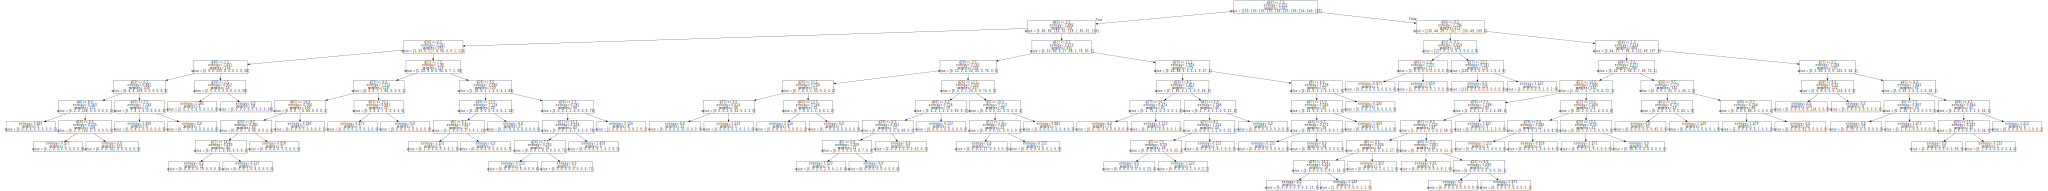

In [7]:
# para dibujar el arbol de decisión
from sklearn.tree import export_graphviz
export_graphviz(dtc, out_file = 'dtc.dot')
import graphviz
with open('dtc.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)